# Heart Disease Dataset Cleaning


Author: [Muhammad Nashirul Haq Putra Najamuddin](https://github.com/nashirulhaq)\
Dataset: [Hear Disease UCI](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data)\
Date: 10.Nov.2024

### Content
#### Column Descriptions:
| Variable   | Description                                                                                   |
|------------|-----------------------------------------------------------------------------------------------|
| age        | Age of the patient in years                                                                   |
| sex        | Gender of the patient (0 = male, 1 = female)                                                  |
| cp         | Chest pain type: 0: Typical angina, 1: Atypical angina, 2: Non-anginal pain, 3: Asymptomatic |
| trestbps   | Resting blood pressure in mm Hg                                                               |
| chol       | Serum cholesterol in mg/dl                                                                    |
| fbs        | Fasting blood sugar level, categorized as above 120 mg/dl (1 = true, 0 = false)               |
| restecg    | Resting electrocardiographic results: 0: Normal, 1: Having ST-T wave abnormality, 2: Showing probable or definite left ventricular hypertrophy |
| thalach    | Maximum heart rate achieved during a stress test                                              |
| exang      | Exercise-induced angina (1 = yes, 0 = no)                                                     |
| oldpeak    | ST depression induced by exercise relative to rest                                             |
| slope      | Slope of the peak exercise ST segment: 0: Upsloping, 1: Flat, 2: Downsloping                   |
| ca         | Number of major vessels (0-4) colored by fluoroscopy                                           |
| thal       | Thalium stress test result: 0: Normal, 1: Fixed defect, 2: Reversible defect, 3: Not described |
| target     | Heart disease status (0 = no disease, 1 = presence of disease)                                 |

## Import Semua Packages/Library yang Digunakan

In [13]:
# import libraries

# 1. to handle the data
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.preprocessing import KBinsDiscretizer
#metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score

# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data

In [2]:
df = pd.read_csv("data/heart_disease_uci.csv")
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


**Insight:**
- xxx
- xxx

### Assessing Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


**Insight:**
- There seems to be a missing values in some of the columns.
- Let's see How much data is missing for each column.

In [4]:
# find missing values.
df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending=False)

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
exang        55
thalch       55
chol         30
restecg       2
dtype: int64

**Insight:**
- Seems like we are missing a lot of data in the 'ca', 'thal', and 'slope' columns.
- Let's check if there is any duplicated data in the dataset.

In [5]:
print("Duplicated data in df: ", df.duplicated().sum())

Duplicated data in df:  0


**Insight:**
- There doesn't seem to be any duplicated data.
- Let's see if there is any outlier in the dataset.

In [6]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


**Insight:**
- There doesn't seems to be any outliers in the dataset.
- But let's see with boxplot to make sure if there is any outlier in the dataset.

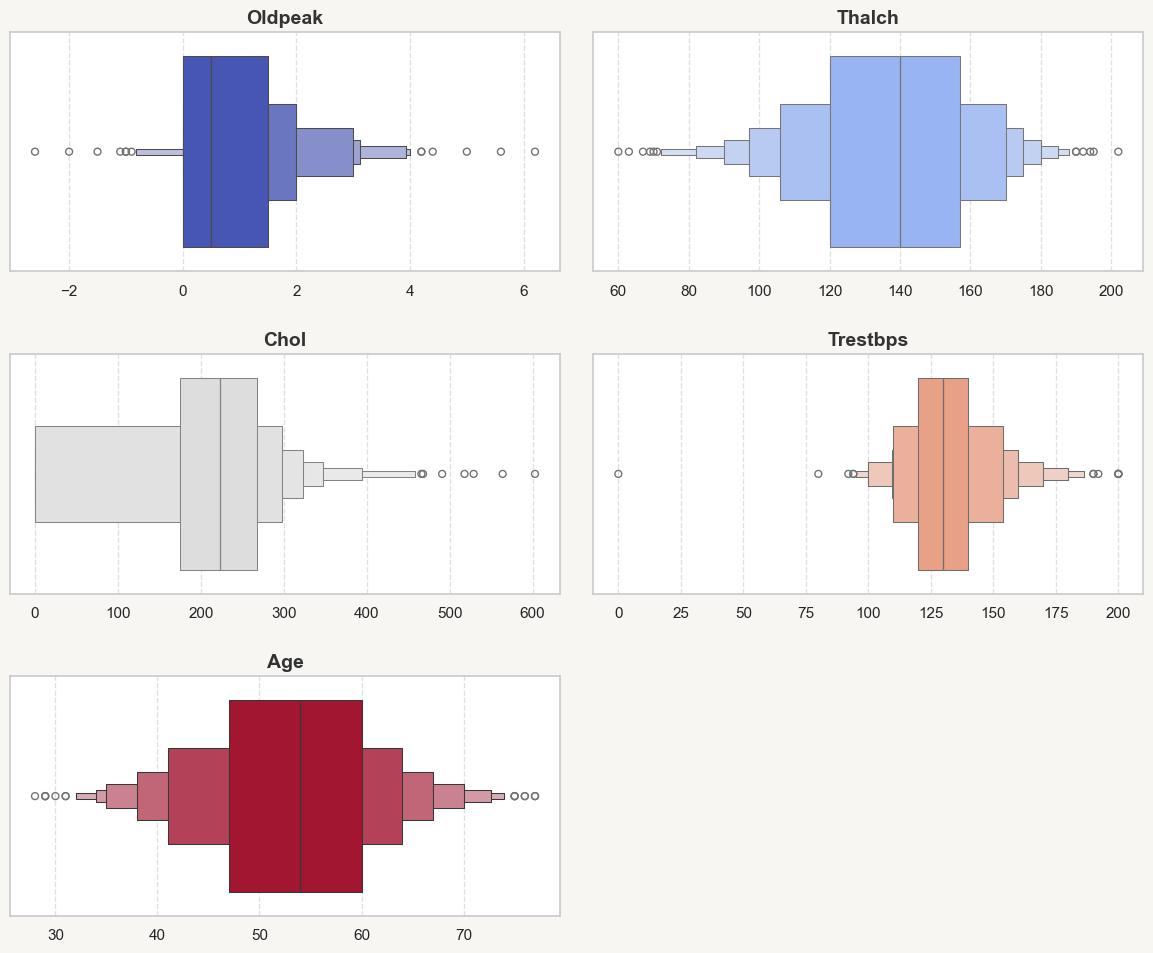

In [12]:
sns.set_theme(style="whitegrid")  # Clean theme for clarity

# Generate a gradient colormap
cmap = cm.get_cmap("coolwarm", len(['oldpeak', 'thalch', 'chol', 'trestbps', 'age']))
colors = [cmap(i) for i in range(cmap.N)]

# Set up the figure
plt.figure(figsize=(12, 10))
plt.gcf().set_facecolor("#F7F6F3")  # Neutral background

# Columns to plot
columns = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

# Create subplots
for i, col in enumerate(columns):
    plt.subplot(3, 2, i + 1)
    sns.boxenplot(
        x=df[col],
        color=colors[i],
        saturation=0.8
    )
    plt.title(
        col.capitalize(), 
        fontsize=14, 
        weight='bold', 
        color="#333333"
    )
    plt.xlabel("")
    plt.grid(axis="x", linestyle="--", alpha=0.6)

# Adjust layout to prevent overlaps
plt.tight_layout(pad=2.0)
plt.show()

**Insight:**
- From the plot above there are values that are too high or too low that might be considered as outliers, but this values are still possible. Except for 'trestbps', because this colomn cannot be 0. So we will treat this one value as an outlier and remove it. Other than that we will keep it as is.
- Now we can move on to the next step of data cleaning.

### Cleaning Data

In [38]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

[]

**Insight:**
- Now that we have identified the columns with missing values, we can decide how to handle them.

In [39]:
# Function to preprocess features
def preprocess_features(X, label_encoders, other_missing_cols, iterative_imputer):
    """
    Encodes categorical variables and imputes missing values in features.
    """
    for col in X.columns:
        if X[col].dtype in ['object', 'category']:
            if col not in label_encoders:
                label_encoders[col] = LabelEncoder()
            X[col] = label_encoders[col].fit_transform(X[col].astype(str))
    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            imputed_values = iterative_imputer.fit_transform(X[col].values.reshape(-1, 1))
            X[col] = imputed_values[:, 0]
    return X

# Generic function to handle imputation
def impute_missing_data(passed_col, is_categorical):
    """
    Imputes missing values for a given column.
    """
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]
    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    # Preprocess features
    global label_encoders
    label_encoders = label_encoders if 'label_encoders' in globals() else {}
    X = preprocess_features(X, label_encoders, other_missing_cols, iterative_imputer)

    if is_categorical:
        # Train classifier
        y = LabelEncoder().fit_transform(y.astype(str))  # Ensure y is categorical
        model = RandomForestClassifier(random_state=42)
    else:
        # Train regressor
        model = RandomForestRegressor(random_state=42)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)

    # Evaluate model
    if is_categorical:
        acc_score = accuracy_score(y_test, model.predict(X_test))
        print(f"The feature '{passed_col}' has been imputed with {round(acc_score * 100, 2)}% accuracy.\n")
    else:
        y_pred = model.predict(X_test)
        print(f"MAE = {mean_absolute_error(y_test, y_pred):.2f}")
        print(f"RMSE = {mean_squared_error(y_test, y_pred, squared=False):.2f}")
        print(f"R2 = {r2_score(y_test, y_pred):.2f}\n")

    # Impute missing values
    if not df_null.empty:
        X_null = preprocess_features(df_null.drop(passed_col, axis=1), label_encoders, other_missing_cols, iterative_imputer)
        df_null[passed_col] = model.predict(X_null)

    return pd.concat([df_not_null, df_null])[passed_col]

# Loop through missing data columns and impute values
for col in missing_data_cols:
    missing_percentage = round((df[col].isnull().sum() / len(df)) * 100, 2)
    print(f"Missing Values in '{col}': {missing_percentage}%")

    if col in categorical_cols:
        df[col] = impute_missing_data(col, is_categorical=True)
    elif col in numeric_cols:
        df[col] = impute_missing_data(col, is_categorical=False)
    else:
        print(f"Skipping column '{col}' as it doesn't match categorical or numeric types.")


In [37]:
# Again CHecking Missing Values 
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

**Insight:**
- After we have dealt with missing Value Now we will handle outliers in the dataset.

In [16]:
# print the row from df where trestbps value is 0
df[df['trestbps']==0]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
753,754,55,Male,VA Long Beach,non-anginal,0.0,0.0,False,normal,155.0,False,1.5,flat,2.0,reversable defect,3


**Insight:**
- Now that we have found the one that is an outlier, we will remove it from the dataset. Because trestbps cannot be zero as per the medical knowledge. We can't have a person with no blood pressure. So this is not a valid data point and we should remove it from our dataset.

In [41]:
# Remove the column because it is an outlier because trestbps cannot be zero.
df= df[df['trestbps']!=0]

**Insight:**
- After removing the outliers let check if the outliers are gone


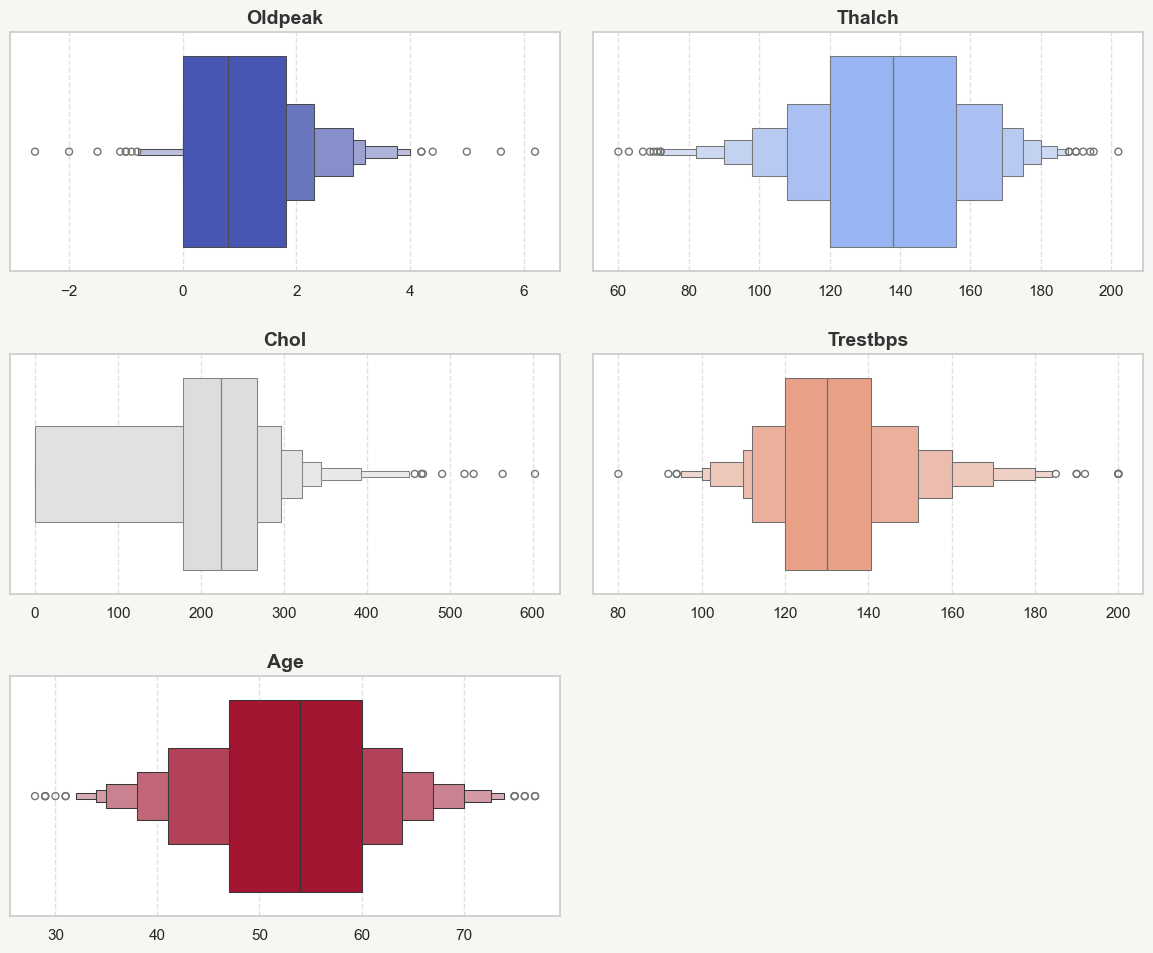

In [42]:
sns.set_theme(style="whitegrid")  # Clean theme for clarity

# Generate a gradient colormap
cmap = cm.get_cmap("coolwarm", len(['oldpeak', 'thalch', 'chol', 'trestbps', 'age']))
colors = [cmap(i) for i in range(cmap.N)]

# Set up the figure
plt.figure(figsize=(12, 10))
plt.gcf().set_facecolor("#F7F6F3")  # Neutral background

# Columns to plot
columns = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

# Create subplots
for i, col in enumerate(columns):
    plt.subplot(3, 2, i + 1)
    sns.boxenplot(
        x=df[col],
        color=colors[i],
        saturation=0.8
    )
    plt.title(
        col.capitalize(), 
        fontsize=14, 
        weight='bold', 
        color="#333333"
    )
    plt.xlabel("")
    plt.grid(axis="x", linestyle="--", alpha=0.6)

# Adjust layout to prevent overlaps
plt.tight_layout(pad=2.0)
plt.show()

**Insight:**
- Now we can see that the lowest values for trestbps is 80, so the outliers are removed. Now let's save the cleaned dataset to use in prediction model.


In [19]:
df.to_csv('cleaned_dataset.csv', index=False, encoding='utf-8')